# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(mouse_metadata,study_results)
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
number_mice = len(combined_data["Mouse ID"].unique())
number_mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRows['Mouse ID'].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data["Mouse ID"]=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_grouped = cleaned_data.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_vol_mean = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_vol_med = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_vol_var = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_vol_std = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_vol_sem = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_vol_by_regimen_data = pd.DataFrame(
    {
        "Mean Tumor Volume": tumor_vol_mean,
        "Median Tumor Volume": tumor_vol_med,
        "Tumor Volume Variance": tumor_vol_var,
        "Tumor Volume Std. Dev.": tumor_vol_std,
        "Tumor Volume Std. Err.": tumor_vol_sem,
    }
)

tumor_vol_by_regimen_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_regim_vols = cleaned_data.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
tumor_regim_vols

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: ylabel='Number of Timepoints'>

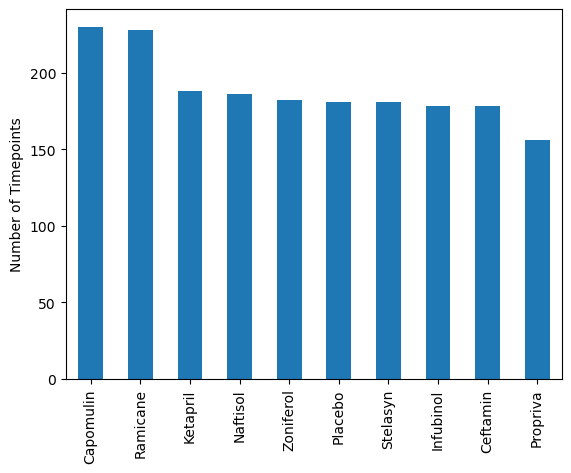

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows_timepoint = cleaned_data["Drug Regimen"].value_counts()
rows_timepoint.plot.bar(x=[0], ylabel='Number of Timepoints')

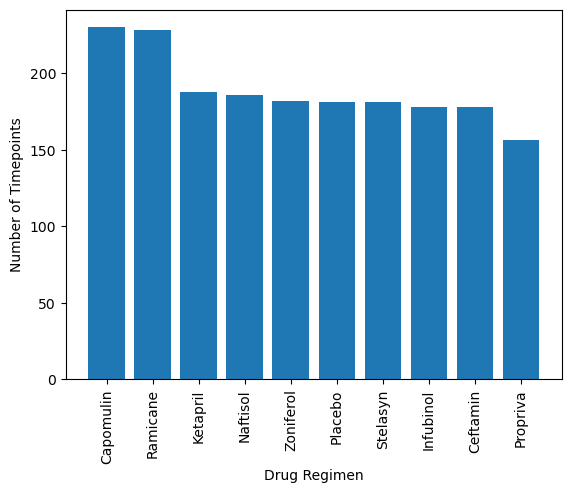

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(rows_timepoint.index, rows_timepoint.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation='vertical')
plt.show()

<Axes: ylabel='sex'>

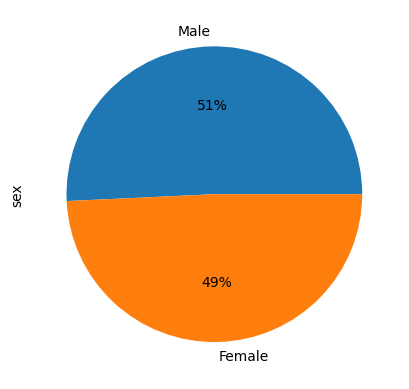

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dist = cleaned_data["Sex"].value_counts()
gender_dist

gender_dist.plot.pie(ylabel='sex', autopct='%1.0f%%')

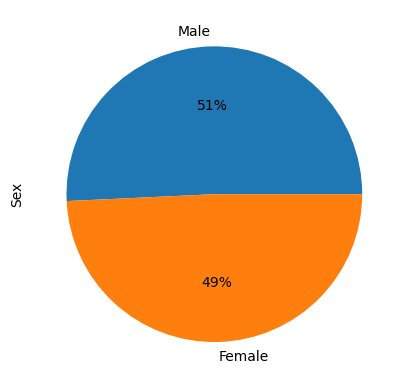

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_dist, labels=['Male','Female'], autopct="%1.0f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse

last_tp = cleaned_data.groupby(["Mouse ID"])['Timepoint'].max()
last_tp_data = last_tp.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tp_data = last_tp_data.merge(cleaned_data,on=['Mouse ID','Timepoint'],how="left")

In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
treatment_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    treatments_df = last_tp_data.loc[last_tp_data["Drug Regimen"] == treatment]
    # Locate the rows which contain mice on each drug and get the tumor volumes

    quartiles = drug_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # add subset 

    subset_df = treatments_df[treatments_df["Timepoint"] == treatments_df["Timepoint"]]
    tumor_volumes = subset_df["Tumor Volume (mm3)"]
    treatment_data.append(tumor_volumes)
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    q_1 = quartiles[.25]
    q_3 = quartiles[.75]
    iqr = q_3 - q_1
    lower_bound = q_1 - (1.5*iqr)
    upper_bound = q_3 + (1.5*iqr)
    outliers = (tumor_volumes.loc[(subset_df["Tumor Volume (mm3)"] > upper_bound) | (subset_df["Tumor Volume (mm3)"] < lower_bound)])
    print(f"{treatment}'s potential outliers': {outliers}")

Capomulin's potential outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers': 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)


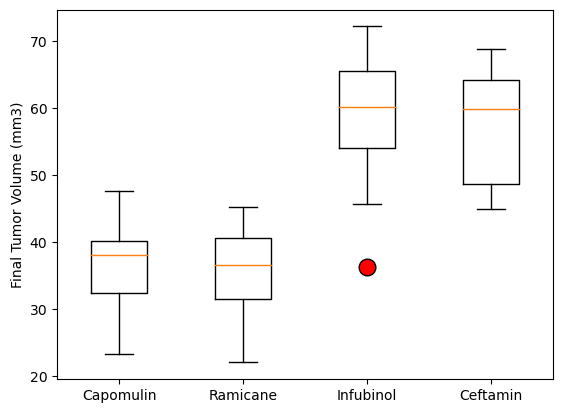

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
flierprops = dict(marker='o', markerfacecolor = 'r', markersize=12)
ax1.boxplot(treatment_data, flierprops = flierprops)
plt.xticks([1,2,3,4], treatments)
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

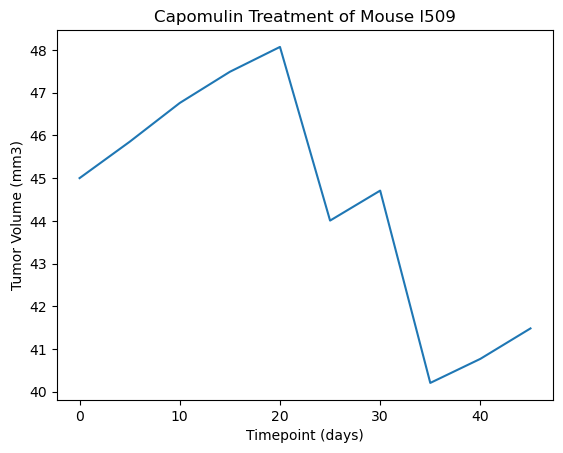

In [67]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_df = cleaned_data.loc[cleaned_data["Mouse ID"] == "l509",:]
x_timepoint = l509_df['Timepoint']
y_tum_size = l509_df["Tumor Volume (mm3)"]

plt.title("Capomulin Treatment of Mouse l509")
plt.plot(x_timepoint, y_tum_size)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

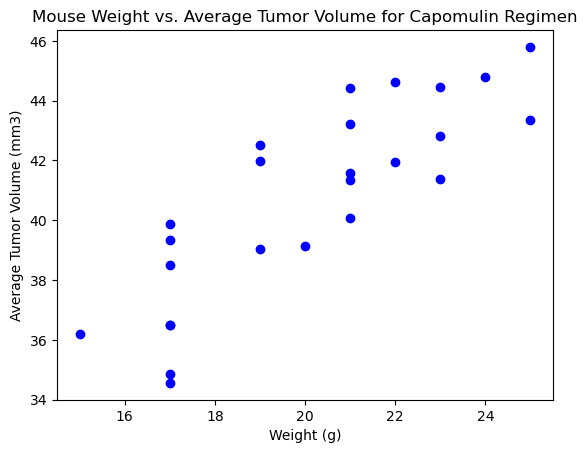

In [68]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin",:]
capomulin_df.head()
x_weight = capomulin_df["Weight (g)"].groupby(capomulin_df['Mouse ID']).mean()
y_avg_tum_vol = capomulin_df["Tumor Volume (mm3)"].groupby(capomulin_df['Mouse ID']).mean()

plt.scatter(x_weight, y_avg_tum_vol, marker='o', color='blue')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [70]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation between mouse weight and the average tumor volume is 0.84


NameError: name 'lineregress' is not defined